# Cement manufacturing - concrete strength prediction

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [30]:
csv = pd.read_csv('concrete.csv')
df = pd.DataFrame(csv)

In [31]:
df.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29


In [37]:
df.dtypes

cement          float64
slag            float64
ash             float64
water           float64
superplastic    float64
coarseagg       float64
fineagg         float64
age               int64
strength        float64
w/c             float64
dtype: object

## Age check
It is important to check the ages of the tests, because the usual age for comparing strength is at 28-days at most cases.

In [32]:
df['age'].value_counts()

age
28     425
3      134
7      126
56      91
14      62
90      54
100     52
180     26
91      22
365     14
270     13
360      6
120      3
1        2
Name: count, dtype: int64

## Exploring the distribution of the strengths

<Axes: xlabel='strength', ylabel='Count'>

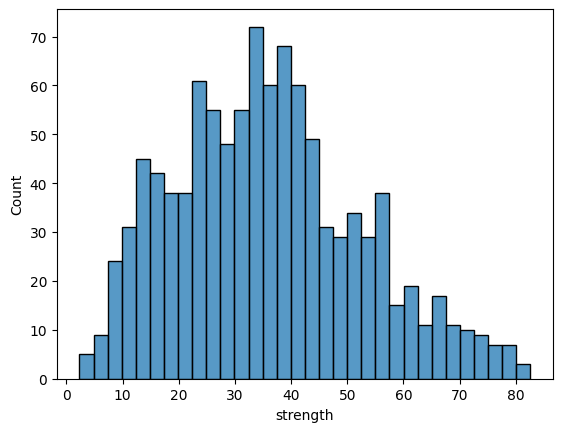

In [33]:
sns.histplot(data=df, x="strength", binwidth=2.5)

## Joining the binders
We need to see the 3 kind of binders combined as well to see the w/c ratio of the mixtures.

In [45]:
df["binder"] = df["cement"] + df["slag"] + df["ash"]

<Axes: xlabel='binder', ylabel='Count'>

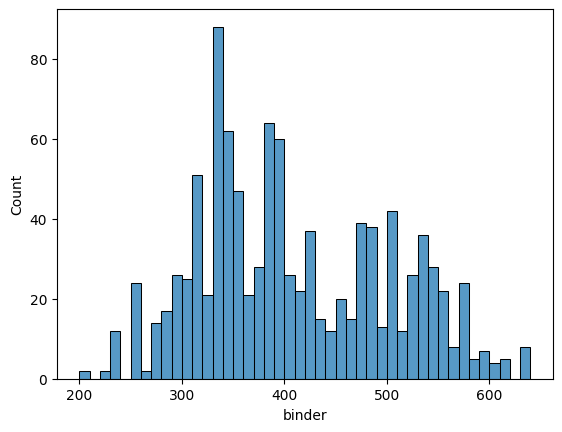

In [56]:
sns.histplot(data=df, x="binder", binwidth=10)

In [82]:
df["w/c"] = np.round((df["water"] + df["superplastic"]) / df["binder"], 3)

<Axes: xlabel='w/c', ylabel='Count'>

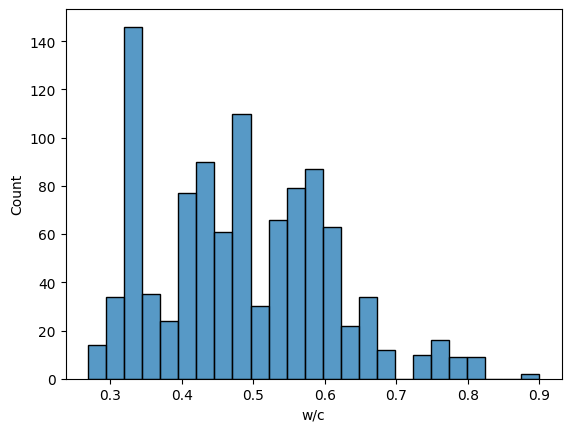

In [83]:
sns.histplot(data=df, x="w/c", binwidth=0.025)

## Filtering for results at 28-days
To see the present correlation between the w/c ratio and strength, we filter for the results only at 28-days.

In [84]:
df_28 = df[df["age"] == 28]
df_28.shape

(425, 14)

<Axes: xlabel='w/c', ylabel='strength'>

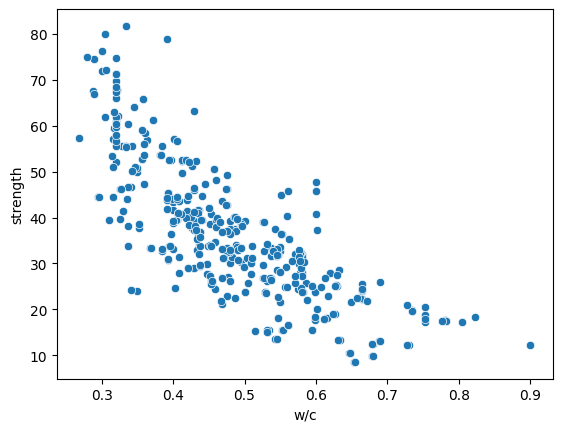

In [85]:
sns.scatterplot(data=df_28, x="w/c", y="strength")

In [86]:
## Examining the ratio of the aggregates

In [87]:
df["agg"] = df["coarseagg"] + df["fineagg"]
df["fineagg_ratio"] = np.round(df["fineagg"] / df["agg"], 3)
df["coarseagg_ratio"] = np.round(df["coarseagg"] / df["agg"], 3)

In [88]:
df.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength,w/c,binder,agg,fineagg_ratio,coarseagg_ratio
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89,0.576,353.3,1720.3,0.435,0.565
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51,0.504,335.4,1877.0,0.424,0.576
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22,0.558,345.7,1818.1,0.474,0.526
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85,0.600,380.0,1602.0,0.418,0.582
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29,0.598,338.2,1744.1,0.399,0.601
